Exploratory Data Analysis




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/IYKRA/dataset_test_ds.xlsx')

In [ ]:
df

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,18181,Technology,wilayah_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,89743,Operations,wilayah_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,29069,Analytics,wilayah_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,28765,Sales & Marketing,wilayah_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


Mengetahui atau Mempelajari Dataset yang dimiliki

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54808 non-null  int64  
 1   departemen               54808 non-null  object 
 2   wilayah                  54808 non-null  object 
 3   pendidikan               52399 non-null  object 
 4   jenis_kelamin            54808 non-null  object 
 5   rekrutmen                54808 non-null  object 
 6   jumlah_training          54808 non-null  int64  
 7   umur                     54808 non-null  int64  
 8   rating_tahun_lalu        50684 non-null  float64
 9   masa_kerja               54808 non-null  int64  
 10  KPI_>80%                 54808 non-null  int64  
 11  penghargaan              54808 non-null  int64  
 12  rata_rata_skor_training  54808 non-null  int64  
 13  dipromosikan             54808 non-null  int64  
dtypes: float64(1), int64(8

In [ ]:
df.describe()

,id_karyawan,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,54346.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,15152.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,34820.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,54376.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,73881.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,93449.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
df.describe(include='object')

,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,wilayah_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Melakukan Data Cleansing



In [ ]:
for col in df.columns:
  print("kolom : {} memiliki NaN value sebanyak \
  {} dari {} row".format(col, 
                         str(df[col].isna().sum()), 
                         str(len(df.index))))

kolom : id_karyawan memiliki NaN value sebanyak   0 dari 54808 row
kolom : departemen memiliki NaN value sebanyak   0 dari 54808 row
kolom : wilayah memiliki NaN value sebanyak   0 dari 54808 row
kolom : pendidikan memiliki NaN value sebanyak   2409 dari 54808 row
kolom : jenis_kelamin memiliki NaN value sebanyak   0 dari 54808 row
kolom : rekrutmen memiliki NaN value sebanyak   0 dari 54808 row
kolom : jumlah_training memiliki NaN value sebanyak   0 dari 54808 row
kolom : umur memiliki NaN value sebanyak   0 dari 54808 row
kolom : rating_tahun_lalu memiliki NaN value sebanyak   4124 dari 54808 row
kolom : masa_kerja memiliki NaN value sebanyak   0 dari 54808 row
kolom : KPI_>80% memiliki NaN value sebanyak   0 dari 54808 row
kolom : penghargaan memiliki NaN value sebanyak   0 dari 54808 row
kolom : rata_rata_skor_training memiliki NaN value sebanyak   0 dari 54808 row
kolom : dipromosikan memiliki NaN value sebanyak   0 dari 54808 row


In [ ]:
df['pendidikan'].mode()

0    Bachelor's
dtype: object

In [ ]:
int(df['rating_tahun_lalu'].mean())

3

In [ ]:
df['pendidikan'].fillna(value = "Bachelor's",inplace=True)

In [ ]:
df['rating_tahun_lalu'].fillna(int(df['rating_tahun_lalu'].mean()),inplace=True)

In [ ]:
for col in df.columns:
  print("kolom : {} memiliki NaN value sebanyak \
  {} dari {} row".format(col, 
                         str(df[col].isna().sum()), 
                         str(len(df.index))))

kolom : id_karyawan memiliki NaN value sebanyak   0 dari 54808 row
kolom : departemen memiliki NaN value sebanyak   0 dari 54808 row
kolom : wilayah memiliki NaN value sebanyak   0 dari 54808 row
kolom : pendidikan memiliki NaN value sebanyak   0 dari 54808 row
kolom : jenis_kelamin memiliki NaN value sebanyak   0 dari 54808 row
kolom : rekrutmen memiliki NaN value sebanyak   0 dari 54808 row
kolom : jumlah_training memiliki NaN value sebanyak   0 dari 54808 row
kolom : umur memiliki NaN value sebanyak   0 dari 54808 row
kolom : rating_tahun_lalu memiliki NaN value sebanyak   0 dari 54808 row
kolom : masa_kerja memiliki NaN value sebanyak   0 dari 54808 row
kolom : KPI_>80% memiliki NaN value sebanyak   0 dari 54808 row
kolom : penghargaan memiliki NaN value sebanyak   0 dari 54808 row
kolom : rata_rata_skor_training memiliki NaN value sebanyak   0 dari 54808 row
kolom : dipromosikan memiliki NaN value sebanyak   0 dari 54808 row


Melakukan Exlplore Data dan Melakukan Visualisasi Data

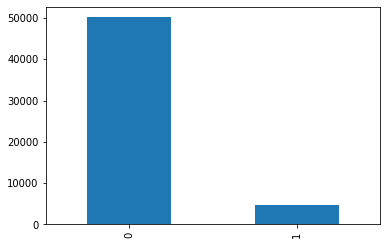

In [ ]:
df['dipromosikan'].value_counts().plot(kind='bar')

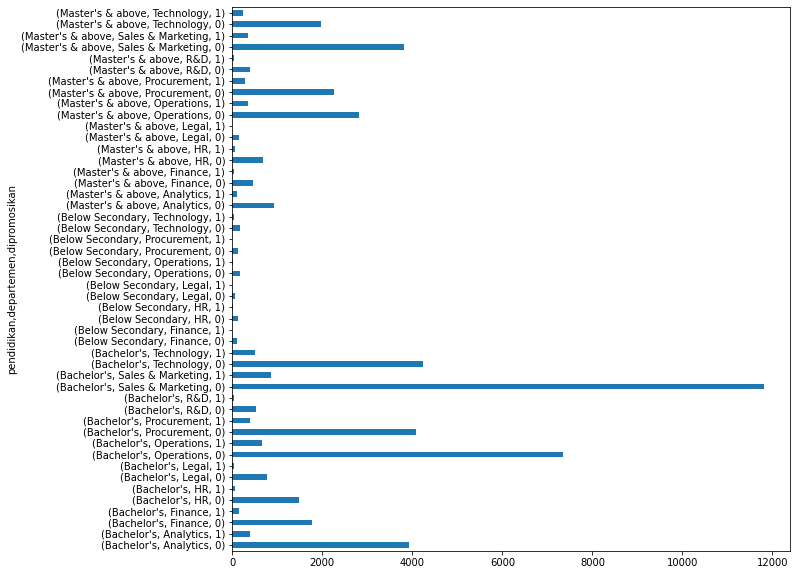

In [ ]:
df[['pendidikan','departemen','dipromosikan']].groupby(by=['pendidikan','departemen']).dipromosikan.value_counts().plot(kind='barh',figsize=[10,10])

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


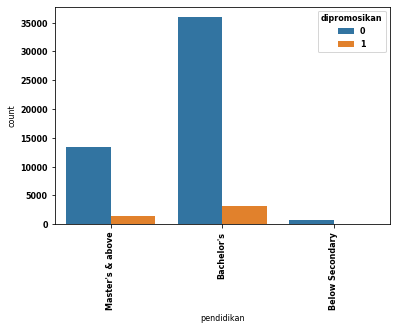

In [ ]:
sns.countplot(x='pendidikan',hue='dipromosikan',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

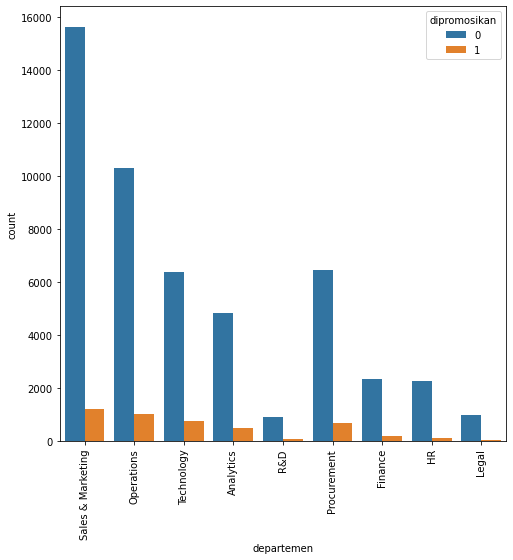

In [ ]:
plt.figure(figsize=[8,8])
sns.countplot(x='departemen',hue='dipromosikan',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

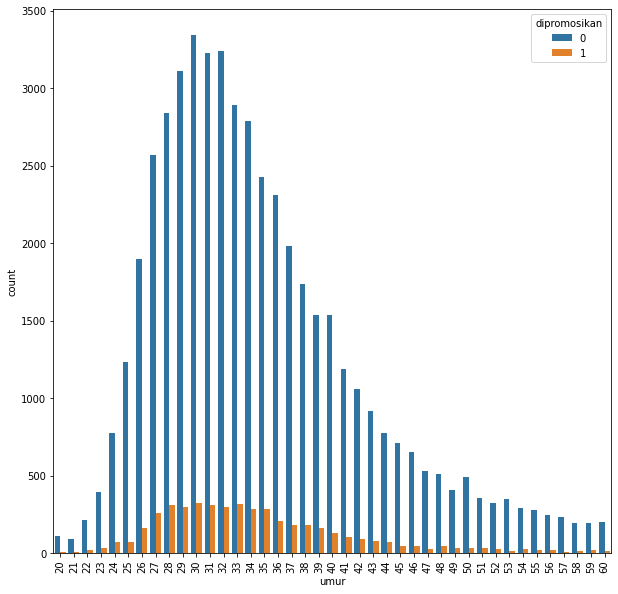

In [ ]:
plt.figure(figsize=[10,10])
sns.countplot(x='umur',hue='dipromosikan',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

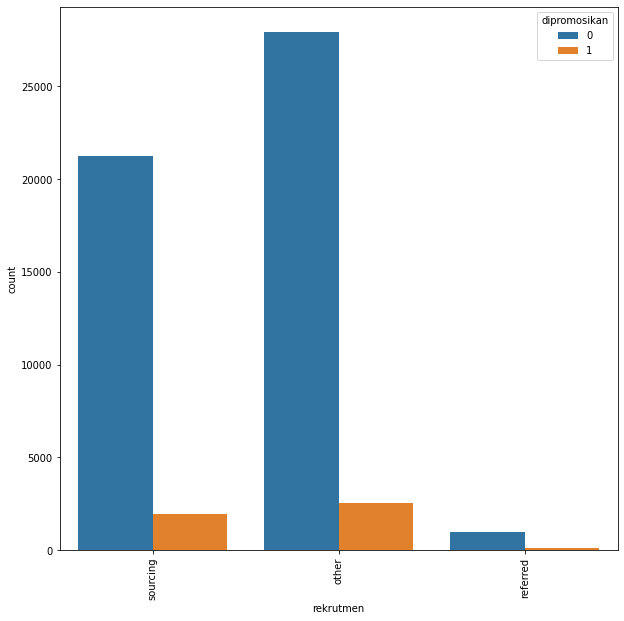

In [ ]:
plt.figure(figsize=[10,10])
sns.countplot(x='rekrutmen',hue='dipromosikan',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

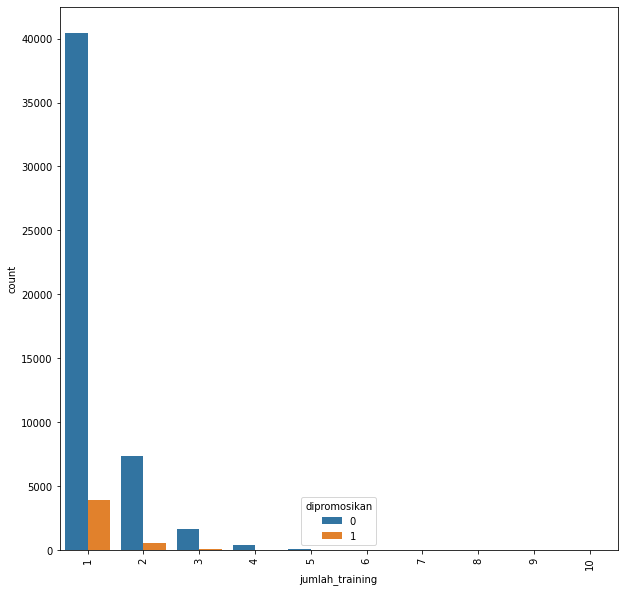

In [ ]:
plt.figure(figsize=[10,10])
sns.countplot(x='jumlah_training',hue='dipromosikan',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

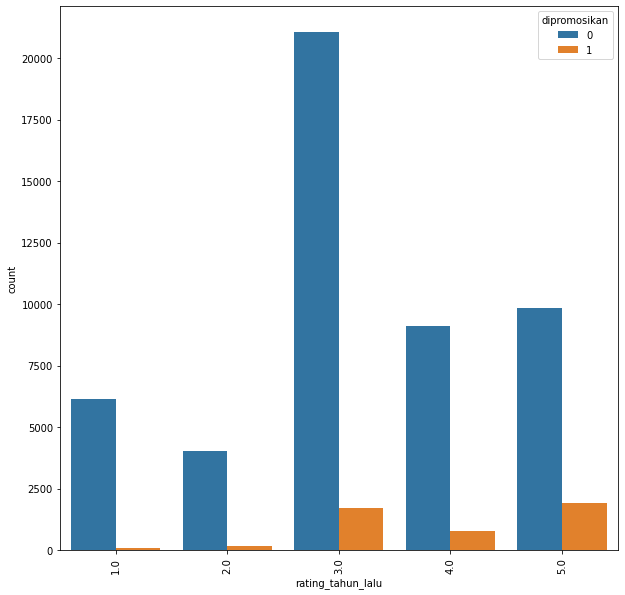

In [ ]:
plt.figure(figsize=[10,10])
sns.countplot(x='rating_tahun_lalu',hue='dipromosikan',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

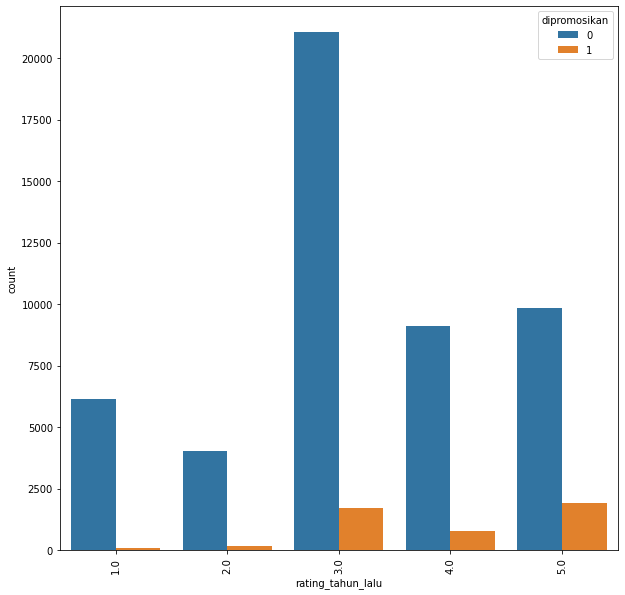

In [ ]:
plt.figure(figsize=[10,10])
sns.countplot(x='rating_tahun_lalu',hue='dipromosikan',data=df)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

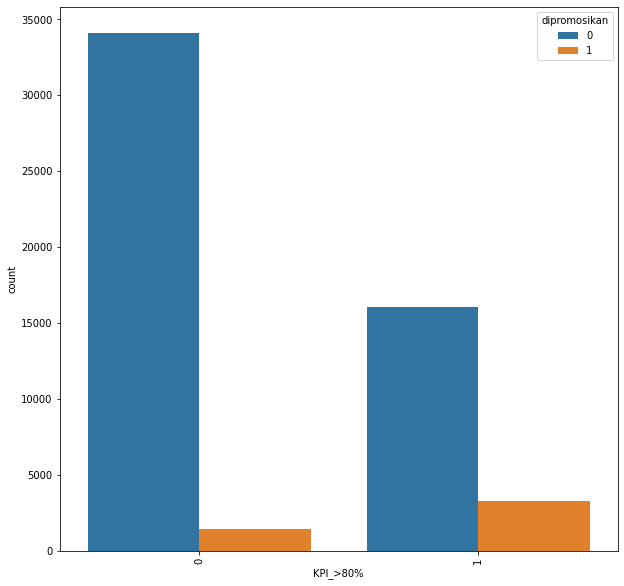

In [ ]:
plt.figure(figsize=[10,10])
sns.countplot(x='KPI_>80%',hue='dipromosikan',data=df)
plt.xticks(rotation=90)

In [ ]:
df['id_karyawan'].duplicated().sum()

0

In [ ]:
df.drop(columns=['id_karyawan'],inplace=True)

In [ ]:
df

,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,wilayah_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,wilayah_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,wilayah_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,wilayah_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,wilayah_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,wilayah_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


Merubah Data kategori Menjadi Numerikal menggunakan One Hot Encoding

In [ ]:
categorical = df.iloc[:,:5]

In [ ]:
categorical

,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen
0,Sales & Marketing,wilayah_7,Master's & above,f,sourcing
1,Operations,wilayah_22,Bachelor's,m,other
2,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing
3,Sales & Marketing,wilayah_23,Bachelor's,m,other
4,Technology,wilayah_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,wilayah_14,Bachelor's,m,sourcing
54804,Operations,wilayah_27,Master's & above,f,other
54805,Analytics,wilayah_1,Bachelor's,m,other
54806,Sales & Marketing,wilayah_9,Bachelor's,m,sourcing


In [ ]:
data_cat = pd.get_dummies(categorical)

In [ ]:
data_cat

,departemen_Analytics,departemen_Finance,departemen_HR,departemen_Legal,departemen_Operations,departemen_Procurement,departemen_R&D,departemen_Sales & Marketing,departemen_Technology,wilayah_wilayah_1,wilayah_wilayah_10,wilayah_wilayah_11,wilayah_wilayah_12,wilayah_wilayah_13,wilayah_wilayah_14,wilayah_wilayah_15,wilayah_wilayah_16,wilayah_wilayah_17,wilayah_wilayah_18,wilayah_wilayah_19,wilayah_wilayah_2,wilayah_wilayah_20,wilayah_wilayah_21,wilayah_wilayah_22,wilayah_wilayah_23,wilayah_wilayah_24,wilayah_wilayah_25,wilayah_wilayah_26,wilayah_wilayah_27,wilayah_wilayah_28,wilayah_wilayah_29,wilayah_wilayah_3,wilayah_wilayah_30,wilayah_wilayah_31,wilayah_wilayah_32,wilayah_wilayah_33,wilayah_wilayah_34,wilayah_wilayah_4,wilayah_wilayah_5,wilayah_wilayah_6,wilayah_wilayah_7,wilayah_wilayah_8,wilayah_wilayah_9,pendidikan_Bachelor's,pendidikan_Below Secondary,pendidikan_Master's & above,jenis_kelamin_f,jenis_kelamin_m,rekrutmen_other,rekrutmen_referred,rekrutmen_sourcing
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
54804,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
54805,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
54806,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1


In [ ]:
non_cat = df.iloc[:,5:13]

In [ ]:
non_cat

,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,1,35,5.0,8,1,0,49,0
1,1,30,5.0,4,0,0,60,0
2,1,34,3.0,7,0,0,50,0
3,2,39,1.0,10,0,0,50,0
4,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...
54803,1,48,3.0,17,0,0,78,0
54804,1,37,2.0,6,0,0,56,0
54805,1,27,5.0,3,1,0,79,0
54806,1,29,1.0,2,0,0,45,0


In [ ]:
dum_data = pd.concat([data_cat,non_cat],axis=1)

In [ ]:
dum_data

,departemen_Analytics,departemen_Finance,departemen_HR,departemen_Legal,departemen_Operations,departemen_Procurement,departemen_R&D,departemen_Sales & Marketing,departemen_Technology,wilayah_wilayah_1,wilayah_wilayah_10,wilayah_wilayah_11,wilayah_wilayah_12,wilayah_wilayah_13,wilayah_wilayah_14,wilayah_wilayah_15,wilayah_wilayah_16,wilayah_wilayah_17,wilayah_wilayah_18,wilayah_wilayah_19,wilayah_wilayah_2,wilayah_wilayah_20,wilayah_wilayah_21,wilayah_wilayah_22,wilayah_wilayah_23,wilayah_wilayah_24,wilayah_wilayah_25,wilayah_wilayah_26,wilayah_wilayah_27,wilayah_wilayah_28,wilayah_wilayah_29,wilayah_wilayah_3,wilayah_wilayah_30,wilayah_wilayah_31,wilayah_wilayah_32,wilayah_wilayah_33,wilayah_wilayah_34,wilayah_wilayah_4,wilayah_wilayah_5,wilayah_wilayah_6,wilayah_wilayah_7,wilayah_wilayah_8,wilayah_wilayah_9,pendidikan_Bachelor's,pendidikan_Below Secondary,pendidikan_Master's & above,jenis_kelamin_f,jenis_kelamin_m,rekrutmen_other,rekrutmen_referred,rekrutmen_sourcing,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,35,5.0,8,1,0,49,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,30,5.0,4,0,0,60,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,34,3.0,7,0,0,50,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,2,39,1.0,10,0,0,50,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,48,3.0,17,0,0,78,0
54804,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,37,2.0,6,0,0,56,0
54805,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,27,5.0,3,1,0,79,0
54806,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,29,1.0,2,0,0,45,0


Melakukan Split Data

In [ ]:
X = dum_data.iloc[:,:58]
y = dum_data['dipromosikan']

In [ ]:
X

,departemen_Analytics,departemen_Finance,departemen_HR,departemen_Legal,departemen_Operations,departemen_Procurement,departemen_R&D,departemen_Sales & Marketing,departemen_Technology,wilayah_wilayah_1,wilayah_wilayah_10,wilayah_wilayah_11,wilayah_wilayah_12,wilayah_wilayah_13,wilayah_wilayah_14,wilayah_wilayah_15,wilayah_wilayah_16,wilayah_wilayah_17,wilayah_wilayah_18,wilayah_wilayah_19,wilayah_wilayah_2,wilayah_wilayah_20,wilayah_wilayah_21,wilayah_wilayah_22,wilayah_wilayah_23,wilayah_wilayah_24,wilayah_wilayah_25,wilayah_wilayah_26,wilayah_wilayah_27,wilayah_wilayah_28,wilayah_wilayah_29,wilayah_wilayah_3,wilayah_wilayah_30,wilayah_wilayah_31,wilayah_wilayah_32,wilayah_wilayah_33,wilayah_wilayah_34,wilayah_wilayah_4,wilayah_wilayah_5,wilayah_wilayah_6,wilayah_wilayah_7,wilayah_wilayah_8,wilayah_wilayah_9,pendidikan_Bachelor's,pendidikan_Below Secondary,pendidikan_Master's & above,jenis_kelamin_f,jenis_kelamin_m,rekrutmen_other,rekrutmen_referred,rekrutmen_sourcing,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,35,5.0,8,1,0,49
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,30,5.0,4,0,0,60
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,34,3.0,7,0,0,50
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,2,39,1.0,10,0,0,50
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,48,3.0,17,0,0,78
54804,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,37,2.0,6,0,0,56
54805,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,27,5.0,3,1,0,79
54806,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,29,1.0,2,0,0,45


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: dipromosikan, Length: 54808, dtype: int64

Implementasi Oversampling

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
scaler = StandardScaler()
smote = SMOTE()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X_over, y_over = smote.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


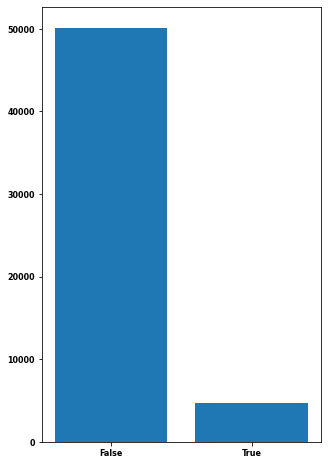

In [ ]:
#Visualisasi Sebelum Oversample
import collections
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

plt.rc('font', **font)
w = collections.Counter(y)
plt.figure(figsize=(5,8))
plt.bar(w.keys(), w.values())
plt.xticks([0,1],['False', 'True'])
plt.show()

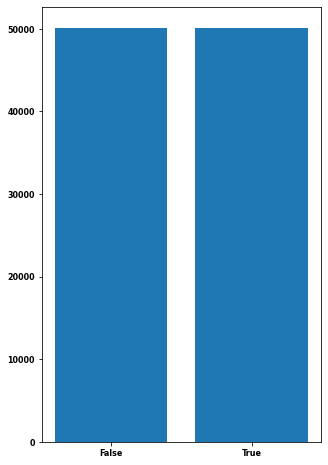

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

plt.rc('font', **font)
w = collections.Counter(y_over)
plt.figure(figsize=(5,8))
plt.bar(w.keys(), w.values())
plt.xticks([0,1],['False', 'True'])
plt.show()

In [ ]:
X_scale = scaler.fit_transform(X_over)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y_over, test_size = 0.4)

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Mempersiapkan Model Classifier, Melakukan Train dan Test Model

In [ ]:
lr = LogisticRegression()
sdgc = SGDClassifier()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, lr_pred)))

Model accuracy score: 0.8062


In [ ]:
sdgc.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sdgc_pred= sdgc.predict(X_test)

In [ ]:
print('Model accuracy using SDGC: {0:0.4f}'. format(accuracy_score(y_test, sdgc_pred)))

Model accuracy using SDGC: 0.8106


In [ ]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gnb_pred = gnb.predict(X_test)

In [ ]:
print('Model accuracy using GNB: {0:0.4f}'. format(accuracy_score(y_test, gnb_pred)))

Model accuracy using GNB: 0.6232


In [ ]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
print('Model accuracy using SVC: {0:0.4f}'. format(accuracy_score(y_test, svc_pred)))

Model accuracy using SVC: 0.9137


In [ ]:
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)

In [ ]:
print('Model accuracy using DTC: {0:0.4f}'. format(accuracy_score(y_test, dtc_pred)))

Model accuracy using DTC: 0.9422


In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
print('Model accuracy using DTC: {0:0.4f}'. format(accuracy_score(y_test, knn_pred)))

Model accuracy using DTC: 0.8934


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


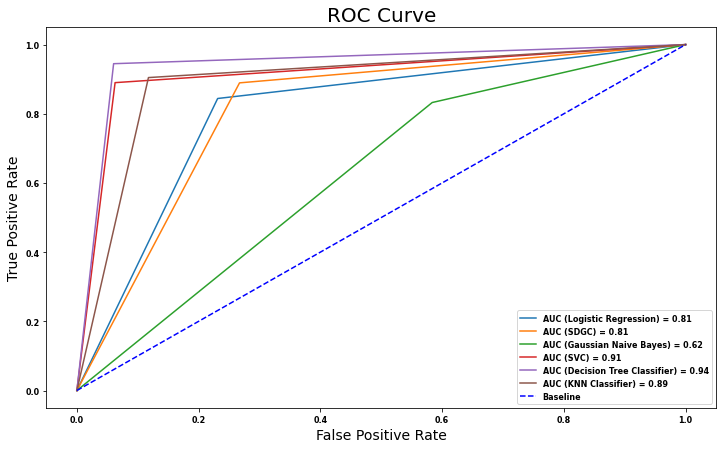

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_lr = roc_auc_score(y_test, lr_pred)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_pred)

auc_sdgc = roc_auc_score(y_test, sdgc_pred)
fpr_sdgc, tpr_sdgc, thresholds_sdgc = roc_curve(y_test, sdgc_pred)

auc_gnb = roc_auc_score(y_test, gnb_pred)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gnb_pred)

auc_svc = roc_auc_score(y_test, svc_pred)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc_pred)

auc_dtc = roc_auc_score(y_test, dtc_pred)
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, dtc_pred)

auc_knn = roc_auc_score(y_test, knn_pred)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_pred)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_sdgc, tpr_sdgc, label=f'AUC (SDGC) = {auc_sdgc:.2f}')
plt.plot(fpr_gnb, tpr_gnb, label=f'AUC (Gaussian Naive Bayes) = {auc_gnb:.2f}')
plt.plot(fpr_svc, tpr_svc, label=f'AUC (SVC) = {auc_svc:.2f}')
plt.plot(fpr_dtc, tpr_dtc, label=f'AUC (Decision Tree Classifier) = {auc_dtc:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN Classifier) = {auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

Model Terbaik yang dapat digunakan pada studi kasus ini Yaitu Model Decision Tree Classifier yang menghasilkan AUC sebesar 0.94 yang merupakan hasil tertinggi dari model yang lainnya.

**Deploy and Maintain Model Lifecycle**
Untuk Mendeploy model ini dapat di deploy ke browser, hal ini dikarenakan data yang akan diinputkan bersifat sensitif dan agar privasi data lebih terjaga daripada menggunakan model server.

Untuk melakukan maintain dapat dipantau kinerjanya apakah masih sesuai dengan proses bisnis yang diharapkan secara berkala. Apabila kinerja model menurun,maka perlu penerapan evaluasi terhadap model apa yang menyebabkan kinerja model menurun.

Jika model menurun maka perlu melatih ulang model dengan cara melatih dari awal atau melanjutkan training  dari model sebelumnya.